<a href="https://colab.research.google.com/github/cristinalestari/assignment/blob/main/assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cristina Lestari 1101190442


**grafik 1 frekuensi 1800MHz**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
    #menghitung c1 dan c2 berdasarkan fc
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    #menghitung cm
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    #menghitung a(hr)
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)

    #menghitung pathloss
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f=1800 #MHz
loc='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
print(d)

[318 305 569 528 558 270 676 531 543 583 518 597 656 619 343 416 202 672
 637 230 566 233 492 608 612 309 223 217 666 333 503 251 667 218 270 530
 420 694 687 433 397 388 554 513 342 677 585 572 608 609 293 571 580 444
 691 474 218 530 315 507 489 266 681 543 554 200 623 330 386 583 564 291
 468 633 698 430 451 505 251 523 343 432 594 515 425 476 413 475 293 309
 457 641 288 472 586 208 404 459 248 698 539 502 405 456 447 336 537 350
 454 423 542 208 505 415 496 289 495 355 517 247 628 556 614 389 425 409
 663 634 666 250 452 374 589 609 320 643 270 699 527 560 361 270 465 574
 499 431 566 286 304 274 394 640 218 636 518 309 648 693 318 349 688 420
 608 419 390 230 532 653 339 699 481 532 399 565 445 380 325 344 487 637
 695 407 368 316 694 344 668 221 413 688 420 567 680 317 372 443 362 272
 632 414]


In [5]:
LpUrban=cos(f,loc,tower,user,d)
LpSuburban=cos(f,loc2,tower,user,d)
LpOpen=cos(f,loc3,tower,user,d)

In [6]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

**kurva frekuensi 1800MHz**

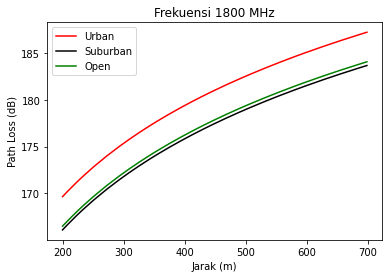

In [7]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='Urban')
plt.plot(d_sort,Suburban_sort,'k-', label='Suburban')
plt.plot(d_sort,Open_sort,'g-', label='Open')
plt.legend()
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

**grafik 2 urban**

In [8]:
f=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [9]:
LpUrban=cos(f,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)

In [10]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

**kurva urban**

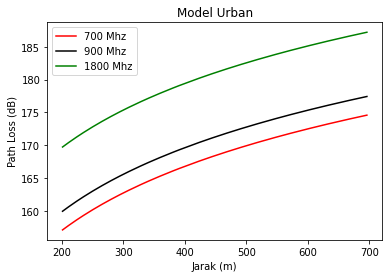

In [11]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='700 Mhz')
plt.plot(d_sort,Urban2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()